# Set up

Borrowing from GPRforAOD, we collect some data for an example pipe. (Oops! I want to train two models with the same GPRDataSourceSpec but can't. At least this is the most convenient way to get the features and targets tables.)

In [1]:
# features to ignore
excludeFeats = [
    "acure_carb_ff_ems", "acure_carb_bb_ems", "acure_carb_res_ems", "acure_anth_so2",
    'acure_carb_ff_ems_eur', 'acure_carb_ff_ems_nam',
    'acure_carb_ff_ems_chi', 'acure_carb_ff_ems_asi',
    'acure_carb_ff_ems_mar', 'acure_carb_ff_ems_r', 'acure_carb_bb_ems_sam',
    'acure_carb_bb_ems_naf', 'acure_carb_bb_ems_saf',
    'acure_carb_bb_ems_bnh', 'acure_carb_bb_ems_rnh',
    'acure_carb_bb_ems_rsh', 'acure_carb_res_ems_chi',
    'acure_carb_res_ems_asi', 'acure_carb_res_ems_afr',
    'acure_carb_res_ems_lat', 'acure_carb_res_ems_r', 'acure_carb_ff_diam',
    'acure_carb_res_diam', 'acure_prim_so4_diam',
    'acure_anth_so2_chi', 'acure_anth_so2_asi',
    'acure_anth_so2_eur', 'acure_anth_so2_nam',
    'acure_volc_so2', 'acure_prim_moc',
    'acure_kappa_oc', 'acure_sig_w', 'acure_rain_frac',
    'acure_cloud_ice_thresh', 'acure_convective_plume_scavenging',
    'acure_scav_diam', 'acure_oxidants_oh',
    'acure_oxidants_o3', 'two_d_fsd_factor', 'c_r_correl',
    'acure_autoconv_exp_lwp',
    'ai', 'm_ci'
]

kernelLen = 59 - len(excludeFeats)

# create kernel
GPR_kernel = c3.SklearnGPRKernelMatern(lengthScale=[1.0]*kernelLen, nu=0.5, coefficient=1.0).build().kernel.upsert()

In [2]:
# define technique
GPR_technique = c3.GaussianProcessRegressionTechnique(
    randomState = 42,
    kernel = GPR_kernel,
    centerTarget = False
).upsert()

GPR_technique2 = c3.GaussianProcessRegressionTechnique(
    randomState = 42,
    kernel = GPR_kernel,
    centerTarget = True
).upsert()

In [3]:
# define data source spec
GPR_dataspec = c3.GPRDataSourceSpec(
    featuresType = c3.TypeRef(
        typeName="SimulationModelParameters"
    ),
    featuresSpec=c3.FetchSpec(
        limit=-1
    ),
    excludeFeatures=excludeFeats,
    targetType=c3.TypeRef(
        typeName="Simulation3HourlyAODOutput"
    ),
    targetSpec=c3.FetchSpec(
        filter="geoSurfaceTimePoint.id == '-0.625_-0.938_2017-07-01T00:20:00'"
    ),
    targetName="all"
).upsert()

In [4]:
# create pipe
GPR_pipe = c3.GaussianProcessRegressionPipe(
    technique=GPR_technique,
    dataSourceSpec=GPR_dataspec
)

GPR_pipe2 = c3.GaussianProcessRegressionPipe(
    technique=GPR_technique2,
    dataSourceSpec=GPR_dataspec
)

## Datasets

In [7]:
X = GPR_pipe.getFeatures()
dfX = c3.Dataset.toPandas(dataset=X)
dfX

,acure_bl_nuc,acure_ait_width,acure_cloud_ph,acure_carb_bb_diam,acure_sea_spray,acure_anth_so2_r,acure_bvoc_soa,acure_dms,acure_dry_dep_ait,acure_dry_dep_acc,acure_dry_dep_so2,acure_bc_ri,bparam,acure_autoconv_exp_nd,dbsdtbs_turb_0,a_ent_1_rp
0,0.500000,0.650000,0.396000,0.095238,0.500000,0.557493,0.466533,0.502277,0.500000,0.500000,0.500000,0.700000,0.500000,0.605000,0.150000,0.460000
1,0.470000,0.500000,0.500000,0.500000,0.530000,0.500000,0.500000,0.470000,0.530000,0.470000,0.530000,0.500000,0.500000,0.500000,0.500000,0.500000
2,0.969888,0.083081,0.478474,0.690581,0.989837,0.232632,0.763283,0.415900,0.031372,0.618559,0.942199,0.244755,0.927093,0.755788,0.774187,0.508725
3,0.132847,0.445265,0.390414,0.283143,0.607072,0.406850,0.009958,0.781631,0.666108,0.407896,0.935930,0.190369,0.950732,0.018570,0.106893,0.936031
4,0.058261,0.630422,0.132292,0.807161,0.545087,0.965923,0.361367,0.918069,0.298250,0.746683,0.307776,0.989161,0.129769,0.651008,0.613814,0.089525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.591530,0.996801,0.170201,0.640570,0.745082,0.584060,0.950993,0.335650,0.155006,0.853673,0.947892,0.633787,0.515917,0.900471,0.035621,0.400788
217,0.774235,0.165151,0.881014,0.736286,0.340840,0.731972,0.097677,0.052142,0.204227,0.511722,0.193137,0.949388,0.786932,0.433408,0.930975,0.116056
218,0.227072,0.231834,0.185796,0.615861,0.500152,0.970222,0.655217,0.854879,0.382876,0.833222,0.093416,0.060917,0.204519,0.741739,0.144573,0.686731
219,0.047377,0.633909,0.721278,0.785446,0.062070,0.138241,0.973379,0.201878,0.680169,0.910051,0.717122,0.568099,0.303059,0.766313,0.259877,0.826032


In [8]:
y = GPR_pipe.getTarget()
dfy = c3.Dataset.toPandas(dataset=y)
dfy

,all
0,0.256851
1,0.211663
2,0.400089
3,0.200046
4,0.228959
...,...
216,0.320603
217,0.358149
218,0.172364
219,0.122626


# Try subtracting off the mean of the target variable

In [9]:
import numpy as np
dfy2 = dfy - np.mean(dfy)
dfy2
y2 = c3.Dataset.fromPython(dfy2)

# Fit models for the two targets

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

In [11]:
kernel = 1.0 * Matern(
    length_scale=[1.0]*dfX.shape[1],
    nu=0.5
)

In [13]:
gaussian_process = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(dfX, dfy)

/opt/conda/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:1623: RuntimeWarning: invalid value encountered in true_divide
  K_gradient = K[..., np.newaxis] * D \


In [15]:
gaussian_process.kernel_

0.324**2 * Matern(length_scale=[31.2, 2.37e+04, 1e+05, 4.83e+04, 6, 39.5, 13.3, 24.9, 12.8, 9.07, 22.6, 17.8, 1e+05, 1e+05, 72.7, 19.3], nu=0.5)

In [16]:
gaussian_process2 = GaussianProcessRegressor(kernel=kernel).fit(dfX, dfy2)

/opt/conda/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:1623: RuntimeWarning: invalid value encountered in true_divide
  K_gradient = K[..., np.newaxis] * D \


In [17]:
gaussian_process2.kernel_

0.165**2 * Matern(length_scale=[8.3, 2.11e+04, 9.02e+04, 1e+05, 1.53, 9.3, 3.38, 6.34, 3.4, 2.24, 5.45, 4.54, 1e+05, 2.98e+03, 18.1, 4.61], nu=0.5)

The length scales are smaller in the second case, with centering.

# Repeat training in C3 methods

## Uncentered target

In [9]:
GPR_trained = GPR_pipe.train(input=X, targetOutput=y)

In [10]:
GPR_trained.upsert()

c3.GaussianProcessRegressionPipe(
 id='c110b047-e27e-4841-b539-8fbdb1ca6f35',
 meta=c3.Meta(
        created=datetime.datetime(2022, 9, 21, 16, 45, 59, tzinfo=datetime.timezone.utc),
        updated=datetime.datetime(2022, 9, 21, 16, 45, 59, tzinfo=datetime.timezone.utc),
        timestamp=datetime.datetime(2022, 9, 21, 16, 45, 59, tzinfo=datetime.timezone.utc)),
 version=1,
 typeIdent='PIPE:LF:GPREG',
 noTrainScore=False,
 untrainableOverride=False)

In [11]:
print(GPR_trained.trainedModel.parameters)

None


In [16]:
pipe = c3.GaussianProcessRegressionPipe.get('c110b047-e27e-4841-b539-8fbdb1ca6f35')

In [17]:
learnedKernel = c3.PythonSerialization.deserialize(serialized=pipe.trainedModel.model).kernel_

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [18]:
learnedKernel.get_params()

{'k1': 0.324**2,
 'k2': Matern(length_scale=[31.2, 2.37e+04, 1e+05, 4.83e+04, 6, 39.5, 13.3, 24.9, 12.8, 9.07, 22.6, 17.8, 1e+05, 1e+05, 72.7, 19.3], nu=0.5),
 'k1__constant_value': 0.10523532947826031,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': array([3.12183392e+01, 2.36850878e+04, 1.00000000e+05, 4.82546446e+04,
        5.99588349e+00, 3.94504852e+01, 1.32537136e+01, 2.48656479e+01,
        1.28286266e+01, 9.06707490e+00, 2.25829382e+01, 1.77539261e+01,
        1.00000000e+05, 1.00000000e+05, 7.27314963e+01, 1.93186312e+01]),
 'k2__length_scale_bounds': (1e-05, 100000.0),
 'k2__nu': 0.5}

## Centered target

In [19]:
GPR_trained2 = GPR_pipe2.train(input=X, targetOutput=y)

In [20]:
GPR_trained2.upsert()

c3.GaussianProcessRegressionPipe(
 id='0e9ed331-feba-4033-8deb-a0ba248f7cc7',
 meta=c3.Meta(
        created=datetime.datetime(2022, 9, 21, 16, 46, 46, tzinfo=datetime.timezone.utc),
        updated=datetime.datetime(2022, 9, 21, 16, 46, 46, tzinfo=datetime.timezone.utc),
        timestamp=datetime.datetime(2022, 9, 21, 16, 46, 46, tzinfo=datetime.timezone.utc)),
 version=1,
 typeIdent='PIPE:LF:GPREG',
 noTrainScore=False,
 untrainableOverride=False)

In [21]:
print(GPR_trained2.trainedModel.parameters)

c3.Mapp<string, any>({'targetMean': 0.2665797502352941})


In [22]:
pipe2 = c3.GaussianProcessRegressionPipe.get('0e9ed331-feba-4033-8deb-a0ba248f7cc7')

In [23]:
learnedKernel2 = c3.PythonSerialization.deserialize(serialized=pipe2.trainedModel.model).kernel_

In [24]:
learnedKernel2.get_params()

{'k1': 0.165**2,
 'k2': Matern(length_scale=[8.3, 2.11e+04, 9.02e+04, 1e+05, 1.53, 9.3, 3.38, 6.34, 3.4, 2.24, 5.45, 4.54, 1e+05, 2.98e+03, 18.1, 4.61], nu=0.5),
 'k1__constant_value': 0.027184252460105016,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': array([8.29830585e+00, 2.11009634e+04, 9.01649139e+04, 1.00000000e+05,
        1.53382410e+00, 9.30405283e+00, 3.37676351e+00, 6.33587793e+00,
        3.39861419e+00, 2.23781969e+00, 5.44933958e+00, 4.54294860e+00,
        1.00000000e+05, 2.97667899e+03, 1.80593423e+01, 4.61165174e+00]),
 'k2__length_scale_bounds': (1e-05, 100000.0),
 'k2__nu': 0.5}

# Compare predictions

## C3 predictions

In [26]:
sourceSpec = c3.GPRDataSourceSpec.get(pipe.dataSourceSpec.id)
nExcFeats = len(sourceSpec.excludeFeatures)
nFeatures = 59 - nExcFeats

In [27]:
# create synthetic data with numpy
import numpy as np

synth = np.random.rand(50, nFeatures)

# cast it into a c3.Dataset
synthDataset = c3.Dataset.fromPython(pythonData=synth)

In [35]:
import pandas as pd
pd.DataFrame(synth).sort_values(0).index

Int64Index([21, 12, 24, 38, 47,  3, 28, 40,  9, 11, 14,  8, 13, 19, 22, 36, 10,
            15, 30, 46, 32, 31, 23,  5, 20, 35, 18, 41, 16, 43, 17,  4, 37,  6,
             7, 39,  2, 49, 48,  0, 42, 27, 26, 33, 45, 34, 25, 44,  1, 29],
           dtype='int64')

In [40]:
y_c = pipe.process(input=synthDataset, computeCov=True)
df_c = c3.Dataset.toPandas(y_c)
df_c

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.166097,3.879682e-03,4.636575e-04,-1.024356e-05,0.000012,0.000025,-2.474130e-05,-3.198287e-05,-1.954801e-05,-1.480475e-05,...,-1.618669e-05,8.673265e-06,1.290388e-05,-3.459415e-05,3.696516e-05,-1.706551e-05,3.630618e-04,-3.280503e-06,-1.212440e-05,6.275213e-05
1,0.162344,4.636575e-04,3.369247e-03,1.617572e-05,-0.000010,-0.000068,-1.829508e-06,5.517047e-06,-4.654660e-06,9.361872e-06,...,-4.709678e-06,-1.986815e-05,4.129166e-06,3.922434e-06,9.207650e-05,1.261718e-05,2.530697e-05,8.800309e-06,-7.129892e-06,4.806317e-05
2,0.266028,-1.024356e-05,1.617572e-05,3.387027e-03,-0.000048,-0.000012,-8.459193e-06,2.596273e-04,-5.699004e-06,2.350042e-06,...,1.743952e-04,2.166641e-05,-1.676007e-05,1.084162e-05,4.510622e-06,4.090894e-07,1.888371e-05,-1.225770e-05,-2.444346e-05,3.131509e-05
3,0.357694,1.235072e-05,-9.882181e-06,-4.769700e-05,0.003494,-0.000001,-6.895480e-05,-9.304758e-05,-2.100237e-05,1.179026e-04,...,-1.839997e-05,-8.562450e-06,-5.616497e-06,-2.086481e-05,-1.024262e-05,-9.735830e-06,-3.046992e-05,3.048077e-04,1.430812e-04,-1.556501e-05
4,0.445233,2.548104e-05,-6.761437e-05,-1.203760e-05,-0.000001,0.004364,-3.386157e-06,-4.178523e-05,2.194456e-06,-1.560132e-05,...,1.938434e-04,-1.764852e-06,2.680140e-04,-2.416408e-05,3.376345e-04,-3.163318e-06,-2.974178e-05,2.618561e-05,1.897192e-05,3.904476e-04
5,0.263292,-2.474130e-05,-1.829508e-06,-8.459193e-06,-0.000069,-0.000003,4.437252e-03,-1.846885e-05,-1.222470e-04,-7.055107e-05,...,-4.186466e-06,1.802796e-04,-1.676472e-06,9.757070e-05,7.312623e-06,-8.411461e-05,-2.579756e-05,-5.563559e-05,6.035966e-04,-5.542903e-07
6,0.206784,-3.198287e-05,5.517047e-06,2.596273e-04,-0.000093,-0.000042,-1.846885e-05,3.490263e-03,7.648179e-06,-3.227057e-05,...,7.388432e-05,-5.579820e-07,-3.847324e-05,-3.871191e-05,-1.672830e-05,-6.135609e-06,5.334717e-05,1.811743e-05,-2.539340e-05,-2.939606e-07
7,0.241362,-1.954801e-05,-4.654660e-06,-5.699004e-06,-0.000021,0.000002,-1.222470e-04,7.648179e-06,2.766327e-03,-1.507207e-05,...,-1.332993e-07,7.908588e-05,2.861141e-06,2.533357e-04,-2.054647e-06,2.973461e-04,-1.176045e-05,-1.355678e-05,-2.661486e-05,-4.393514e-06
8,0.388417,-1.480475e-05,9.361872e-06,2.350042e-06,0.000118,-0.000016,-7.055107e-05,-3.227057e-05,-1.507207e-05,4.415841e-03,...,-1.653711e-05,-4.920175e-05,-1.275748e-06,-2.533814e-05,2.570628e-06,-5.181095e-05,-2.282595e-05,-4.802964e-05,1.083894e-04,-5.743535e-06
9,0.205390,-1.017436e-06,1.300428e-04,-2.685694e-07,-0.000006,-0.000046,1.094156e-05,1.151820e-05,1.553712e-06,1.705776e-05,...,-2.752720e-05,-2.628701e-05,-1.810797e-05,1.949557e-06,2.584075e-04,6.264396e-06,-1.418727e-05,-3.893360e-06,6.808771e-06,2.047492e-05


In [29]:
y_c2 = pipe2.process(input=synthDataset, computeCov=True)
df_c2 = c3.Dataset.toPandas(y_c2)
df_c2['0'] += GPR_trained2.trainedModel.parameters['targetMean']

df_c2

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.167083,3.955830e-03,4.757375e-04,-1.121240e-05,0.000014,1.920894e-05,-2.637228e-05,-3.002606e-05,-2.003249e-05,-1.203058e-05,...,-1.860991e-05,7.862317e-06,1.248869e-05,-3.467471e-05,3.373356e-05,-1.499735e-05,3.584476e-04,-3.571046e-06,-1.198645e-05,5.610856e-05
1,0.159714,4.757375e-04,3.425082e-03,1.467844e-05,-0.000012,-6.357056e-05,-1.579754e-06,5.429726e-06,-5.864909e-06,8.229321e-06,...,-5.548386e-06,-1.905476e-05,4.898075e-06,1.713931e-06,8.412966e-05,1.091067e-05,2.616199e-05,9.138426e-06,-5.970930e-06,4.020684e-05
2,0.267671,-1.121240e-05,1.467844e-05,3.441855e-03,-0.000049,-1.030169e-05,-6.663747e-06,2.783264e-04,-4.471972e-06,3.443786e-06,...,1.850061e-04,1.738557e-05,-1.461153e-05,7.357385e-06,1.608833e-07,-6.228880e-08,1.681894e-05,-1.174692e-05,-1.921869e-05,3.030545e-05
3,0.357059,1.423956e-05,-1.192391e-05,-4.933296e-05,0.003580,-4.493335e-06,-7.091412e-05,-8.604586e-05,-2.042594e-05,1.152793e-04,...,-1.951273e-05,-3.357713e-06,-6.156129e-06,-1.748024e-05,-1.104070e-05,-1.299716e-05,-2.677519e-05,2.666245e-04,1.421780e-04,-1.768138e-05
4,0.440422,1.920894e-05,-6.357056e-05,-1.030169e-05,-0.000004,4.429121e-03,-4.607819e-06,-3.666799e-05,2.286992e-06,-1.195356e-05,...,2.021018e-04,6.274920e-07,2.423459e-04,-2.031053e-05,3.613493e-04,8.757340e-08,-2.791923e-05,2.297247e-05,1.523138e-05,3.799580e-04
5,0.265020,-2.637228e-05,-1.579754e-06,-6.663747e-06,-0.000071,-4.607819e-06,4.489011e-03,-1.772185e-05,-1.167285e-04,-7.211130e-05,...,-5.130928e-06,1.780063e-04,-1.971680e-06,8.628564e-05,7.252032e-06,-8.433729e-05,-2.895372e-05,-5.633056e-05,6.055017e-04,-1.672927e-06
6,0.205465,-3.002606e-05,5.429726e-06,2.783264e-04,-0.000086,-3.666799e-05,-1.772185e-05,3.569832e-03,7.636163e-06,-2.617637e-05,...,7.931501e-05,-3.923444e-06,-3.769104e-05,-3.638172e-05,-1.506605e-05,-7.060258e-06,5.090273e-05,2.163916e-05,-2.185684e-05,6.396731e-07
7,0.240613,-2.003249e-05,-5.864909e-06,-4.471972e-06,-0.000020,2.286992e-06,-1.167285e-04,7.636163e-06,2.824036e-03,-4.227219e-06,...,1.126602e-06,6.450051e-05,2.562547e-06,2.609378e-04,-1.449097e-06,2.993546e-04,-1.306795e-05,-1.348185e-05,-2.449875e-05,-3.157016e-06
8,0.383190,-1.203058e-05,8.229321e-06,3.443786e-06,0.000115,-1.195356e-05,-7.211130e-05,-2.617637e-05,-4.227219e-06,4.441195e-03,...,-1.178589e-05,-4.706516e-05,-1.025033e-06,-2.528510e-05,1.545246e-06,-5.575048e-05,-2.085177e-05,-4.502076e-05,1.044019e-04,-3.544762e-06
9,0.205507,2.245022e-06,1.462622e-04,-1.970862e-06,-0.000008,-5.042561e-05,1.144116e-05,1.206633e-05,5.580487e-07,1.428232e-05,...,-2.670359e-05,-2.640656e-05,-1.817052e-05,-1.336783e-06,2.609345e-04,4.056415e-06,-1.600343e-05,-3.275133e-06,7.815723e-06,1.697174e-05


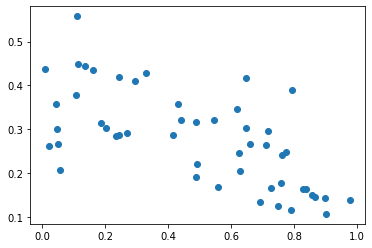

In [47]:
import matplotlib.pyplot as plt

plt.scatter(pd.DataFrame(synth).iloc[:, 9], df_c.iloc[:, 0])
plt.plot(pd.DataFrame(synth).iloc[:, 9], df_c.iloc[:, 0] + df)
plt.show()

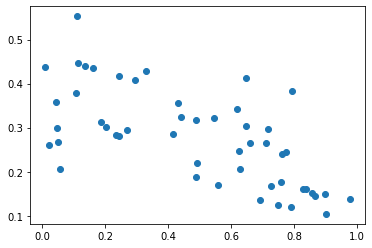

In [48]:
import matplotlib.pyplot as plt

plt.scatter(pd.DataFrame(synth).iloc[:, 9], df_c2.iloc[:, 0])
plt.show()

## Sklearn predictions

In [67]:
predictions, covariance = gaussian_process2.predict(synth, return_cov=True)

In [72]:
predictions.flatten() + float(np.mean(dfy))

array([0.13087088, 0.16867279, 0.43316973, 0.34213575, 0.21274837,
       0.24216007, 0.29793191, 0.15983887, 0.24295689, 0.18636371,
       0.23024391, 0.14593751, 0.10166183, 0.20542482, 0.28563712,
       0.13823506, 0.15075036, 0.30845941, 0.47864515, 0.25057811,
       0.23674486, 0.2583883 , 0.20874354, 0.17538373, 0.28054677,
       0.21891327, 0.3448946 , 0.12560874, 0.1117535 , 0.36841021,
       0.14397634, 0.2844302 , 0.34977726, 0.15378642, 0.12431047,
       0.25982214, 0.14987068, 0.38823552, 0.27944965, 0.26976617,
       0.3442033 , 0.31006688, 0.20810357, 0.21242835, 0.41973619,
       0.2545455 , 0.24317923, 0.16555183, 0.32794927, 0.31568554])

(array([3., 4., 5., 7., 8., 7., 5., 5., 3., 3.]),
 array([-2.43481901e-11, -1.89901372e-11, -1.36320844e-11, -8.27403146e-12,
        -2.91597857e-12,  2.44207432e-12,  7.80012721e-12,  1.31581801e-11,
         1.85162330e-11,  2.38742859e-11,  2.92323388e-11]),
 <BarContainer object of 10 artists>)

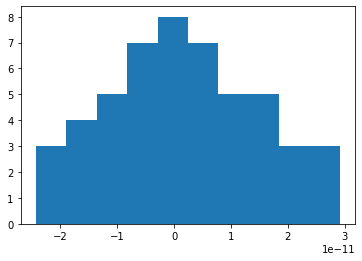

In [89]:
import matplotlib.pyplot as plt

plt.hist(predictions.flatten() + float(np.mean(dfy)) - np.array(df_c2['0']))

(array([8.000e+00, 1.600e+01, 2.400e+01, 2.260e+02, 2.175e+03, 3.600e+01,
        1.300e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-5.42354356e-13, -4.14024370e-13, -2.85694385e-13, -1.57364399e-13,
        -2.90344138e-14,  9.92955718e-14,  2.27625557e-13,  3.55955543e-13,
         4.84285528e-13,  6.12615514e-13,  7.40945499e-13]),
 <BarContainer object of 10 artists>)

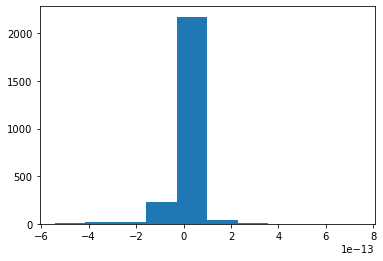

In [90]:
plt.hist(covariance.flatten() - np.array(df_c2.loc[:, '1':]).flatten())